In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

file_name = 'C:\car+evaluation\car.data'
col_name=['buying','maint','doors','persons','lug_boot','safety','label']
data = pd.read_csv(file_name, header=None, names=col_name)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
    data[i]=le.fit_transform(data[i])
data

,buying,maint,doors,persons,lug_boot,safety,label
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [26]:
type(data)

pandas.core.frame.DataFrame

In [27]:
data.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
label       0
dtype: int64

In [28]:
data.columns


Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'label'], dtype='object')

Text(0.5, 1.0, 'Label')

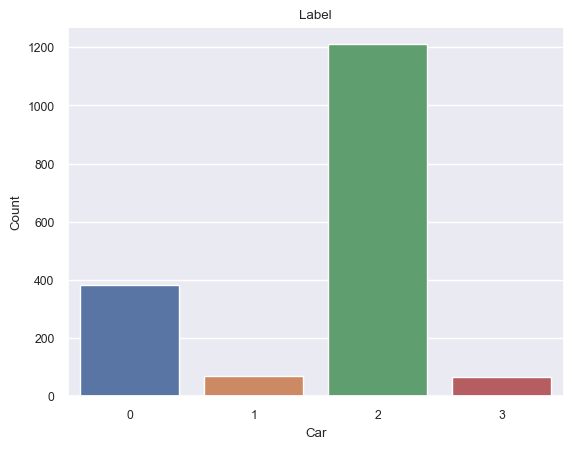

In [29]:
sns.countplot(data = data, x="label")
plt.xlabel("Car")
plt.ylabel("Count")
plt.title("Label")

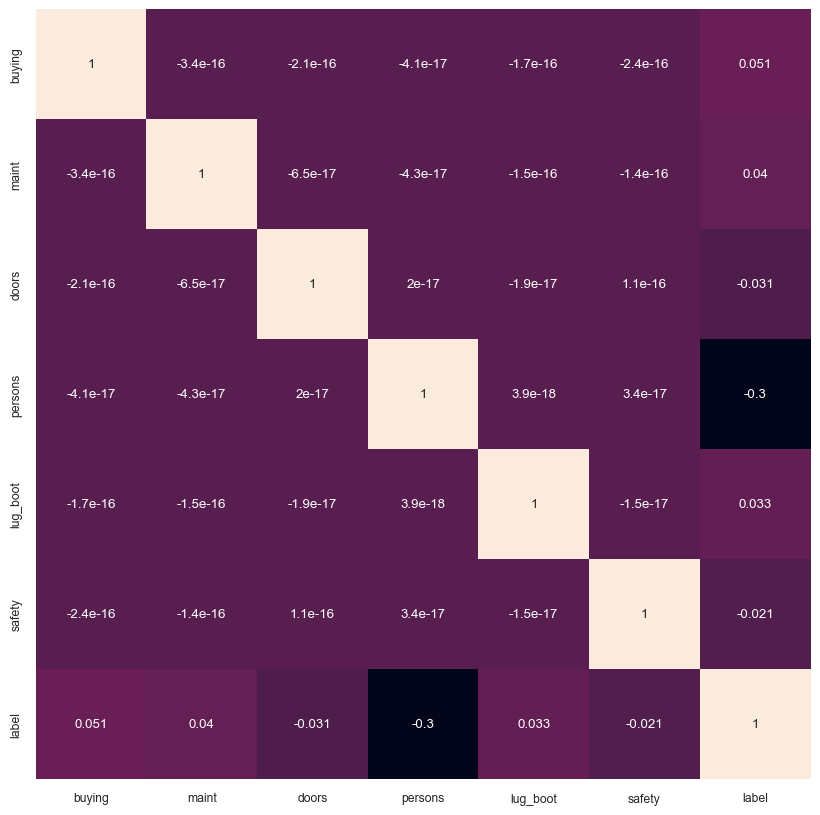

In [30]:
df_corr = data.corr()

plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [31]:
#Splitting the data into training and test test
X = data.iloc[:,0:6].values
y = data.iloc[:,6].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 


In [32]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(900,input_shape=(6,),activation='relu'))
model.add(Dense(450,activation='relu'))
model.add(Dense(450,activation='relu'))
model.add(Dense(4,activation='sigmoid'))

model.compile(Adam(lr=0.02),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 900)               6300      
                                                                 
 dense_9 (Dense)             (None, 450)               405450    
                                                                 
 dense_10 (Dense)            (None, 450)               202950    
                                                                 
 dense_11 (Dense)            (None, 4)                 1804      
                                                                 
Total params: 616504 (2.35 MB)
Trainable params: 616504 (2.35 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
44/44 [==============================] - 4s 30ms/step - loss: 0.3450 - accuracy: 0.6939 - val_loss: 0.3035 - val_accuracy: 0.6821
Epoch 2/100
44/44 [==============================] - 1s 21ms/step - loss: 0.2666 - accuracy: 0.7258 - val_loss: 0.2458 - val_accuracy: 0.7168
Epoch 3/100
44/44 [==============================] - 1s 20ms/step - loss: 0.2078 - accuracy: 0.7887 - val_loss: 0.1848 - val_accuracy: 0.7977
Epoch 4/100
44/44 [==============================] - 1s 20ms/step - loss: 0.1463 - accuracy: 0.8763 - val_loss: 0.1537 - val_accuracy: 0.8584
Epoch 5/100
44/44 [==============================] - 1s 19ms/step - loss: 0.1338 - accuracy: 0.8676 - val_loss: 0.1358 - val_accuracy: 0.9133
Epoch 6/100
44/44 [==============================] - 1s 19ms/step - loss: 0.1101 - accuracy: 0.9059 - val_loss: 0.1061 - val_accuracy: 0.9277
Epoch 7/100
44/44 [==============================] - 1s 20ms/step - loss: 0.1091 - accuracy: 0.9009 - val_loss: 0.1202 - val_accuracy: 0.9075
Epoch 

Epoch 58/100
44/44 [==============================] - 2s 38ms/step - loss: 1.3334e-04 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 59/100
44/44 [==============================] - 2s 36ms/step - loss: 1.2769e-04 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 60/100
44/44 [==============================] - 1s 32ms/step - loss: 1.2102e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 61/100
44/44 [==============================] - 1s 30ms/step - loss: 1.1351e-04 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 62/100
44/44 [==============================] - 1s 33ms/step - loss: 1.0927e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 63/100
44/44 [==============================] - 1s 29ms/step - loss: 1.0499e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 64/100
44/44 [==============================] - 1s 31ms/step - loss: 9.8041e-05 - accuracy: 1.0000 - val_loss: 0

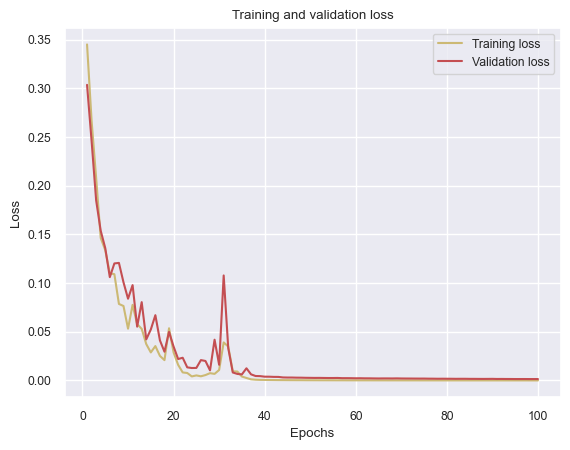

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

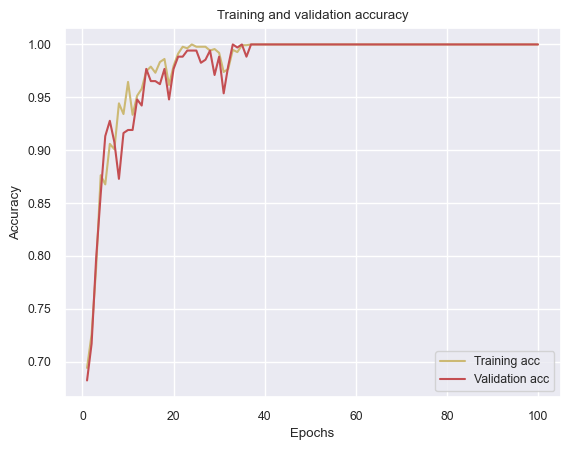

In [35]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [36]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00       240
           3       1.00      1.00      1.00        10

    accuracy                           1.00       346
   macro avg       1.00      1.00      1.00       346
weighted avg       1.00      1.00      1.00       346

[[ 79   0   0   0]
 [  0  17   0   0]
 [  0   0 240   0]
 [  0   0   0  10]]
